# Описание проекта
## Задача
Сеть фитнес-центров «Культурист-датасаентист» разрабатывает стратегию взаимодействия с клиентами на основе аналитических данных.

Распространённая проблема фитнес-клубов и других сервисов — отток клиентов. Как понять, что клиент больше не с вами? Можно записать в отток тех, кто попросил закрыть договор или удалил аккаунт. Однако клиенты не всегда уходят демонстративно: чаще перестают пользоваться сервисом тихо.

Индикаторы оттока зависят от специфики отрасли. Когда пользователь редко, но стабильно закупается в интернет-магазине — не похоже, что он «отвалился». А вот если две недели не заходит на канал с ежедневно обновляемым контентом, дела плохи: подписчик заскучал и, кажется, оставил вас.

Для фитнес-центра можно считать, что клиент попал в отток, если за последний месяц ни разу не посетил спортзал. Конечно, не исключено, что он уехал на Бали и по приезде обязательно продолжит ходить на фитнес. Однако чаще бывает наоборот. Если клиент начал новую жизнь с понедельника, немного походил в спортзал, а потом пропал — скорее всего, он не вернётся.

Чтобы бороться с оттоком, отдел по работе с клиентами «Культуриста-датасаентиста» перевёл в электронный вид множество клиентских анкет. Ваша задача — провести анализ и подготовить план действий по удержанию клиентов.

А именно:

* научиться прогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента;
* сформировать типичные портреты клиентов: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;
* проанализировать основные признаки, наиболее сильно влияющие на отток;
* сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами:

   1) выделить целевые группы клиентов;

   2) предложить меры по снижению оттока;

   3) определить другие особенности взаимодействия с клиентами.


# Данные клиента за предыдущий до проверки факта оттока месяц:
* gender' — пол;
* Near_Location' — проживание или работа в районе, где находится фитнес-центр;
* Partner' — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);
* Promo_friends — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);
* Phone' — наличие контактного телефона;
* Age' — возраст;
* Lifetime' — время с момента первого обращения в фитнес-центр (в месяцах).

Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:
* Contract_period' — длительность текущего действующего абонемента (месяц, 6 месяцев, год);
* Month_to_end_contract' — срок до окончания текущего действующего абонемента (в месяцах);
* Group_visits' — факт посещения групповых занятий;
* Avg_class_frequency_total' — средняя частота посещений в неделю за все время с начала действия абонемента;
* Avg_class_frequency_current_month' — средняя частота посещений в неделю за предыдущий месяц;
* Avg_additional_charges_total' — суммарная выручка от других услуг фитнес-центра: кафе, спорттовары, косметический и массажный салон.
* Churn' — факт оттока в текущем месяце.

# Шаг 1. Загрузите данные
«Культурист-датасаентист» предоставил сведения в csv-файлах. Заказчик подготовил данные, которые содержат данные на месяц до оттока и факт оттока на определённый месяц.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
gym = pd.read_csv('/datasets/gym_churn.csv')
gym.head()


,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [3]:
gym.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

# Шаг 2. Проведите исследовательский анализ данных (EDA)
* Посмотрите на датасет: есть ли в нем отсутствующие признаки, изучите средние значения и стандартные отклонения (пригодится метод describe());
* Посмотрите на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался (воспользуйтесь методом groupby());
* Постройте столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток);
* Постройте матрицу корреляций и отобразите её.

In [4]:
gym.columns = gym.columns.str.lower()

In [5]:
gym.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


* gender — пол. Мужчин и женщин примерно поровну. Стандартное отклонение - 0.5
* near_location' — проживание или работа в районе, где находится фитнес-центр. 85% клиентов проживают или работают в районе, где находится фитнес-центр. Стандартное отклонение - 0.36.
* partner' — сотрудник компании-партнёра клуба. 49% это сотрудники компании-партнёра клуба. Стандартное отклонение - 0.5
* promo_friends — факт первоначальной записи в рамках акции «приведи друга». 31% клиентов, которые пришли в рамках акции «приведи друга». Стандартное отклонение - 0.46
* phone' — наличие контактного телефона. У 90% клиентов указан номер контактного телефона. Стандартное отклонение - 0.3
* contract_period' — длительность текущего действующего абонемента. Длительность текущих абониментов в среднем 4-5 месяцев. Стандартное отклонение - 4.55
* group_visits' — факт посещения групповых занятий. 41% посещают групповые занятия. Стандартное отклонение - 0.49
* age' — возраст. Средний возраст клиентов 29 лет. Минимум 18, максимум 41 год.  Стандартное отклонение - 3.26
* avg_additional_charges_total' — суммарная выручка от других услуг фитнес-центра: кафе, спорттовары, косметический и массажный салон.  Средняя выручка от других услуг 147, медиана 136, максимум 553. Стандартное отклонение - 96.36
* month_to_end_contract' — срок до окончания текущего действующего абонемента (в месяцах). В среднем до конца абонемента остается 4-5 месяца. Стандартное отклонение - 4.19
* lifetime' — время с момента первого обращения в фитнес-центр (в месяцах). В среднем клиенты познакомились с нашим фитнесом 3-4 месяца назад. Стандартное отклонение - 3.75
* Avg_class_frequency_total' — средняя частота посещений в неделю за все время с начала действия абонемента. Средняя частота посещений в неделю - 1.88 Стандартное отклонение - 0.97
* Avg_class_frequency_current_month' — средняя частота посещений в неделю за предыдущий месяц. Средняя частота посещений в неделю стала - 1.77 и она меньше чем за все время. Стандартное отклонение - 1.05
* Churn' — факт оттока в текущем месяце. Отток в текущем месяце - 27%. Стандартное отклонение - 0.44

In [6]:
gym.groupby('churn').agg('mean')

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


* Мужчин и женщин ушло  примерно одинаково
* Из оставшихся 87% живут рядом с фитнесом. Из ушедших только 76% живут рядом
* Остались 53% сотрудников партнеров. Ушли 36% сотрудников партнеров
* Осталось 35% клиента по акции «приведи друга». Ушли 18%
* Остались те, те у кого абонимент на 6 месяцев. Ушли у кого 1-2
* Остались 46% кто посещяет групповые занятия. Ушли 18%
* Остались клиенты чуть постарше примерно 30 лет. Ушли в среднем 27 лет
* Остались те, кто потратил на доругие услуги больше, это в среднем 158. Ушли, кто в среднем тратит 115
* Остались те, у кого до конца абонемента 5 месяцев. Ушли те у кого 1-2 месяца до конца
* Остались те, кто уже почти 5 месяцев ходит в зал. Ушли новички, которые почти 1 месяц всего ходят
* Ну и остались те, кто в среднем проводит 2 тренировки в неделю. ушли те, кто проводит в среднем 1 



In [7]:
gym_churn_1 = gym.query('churn == 1')
gym_churn_0 = gym.query('churn == 0')
columns = gym.drop(columns=['churn'])

def hist(df, columns):
    for i in columns:
        plt.figure(figsize =(14, 5))
        sns.histplot(gym[i])
        plt.title('Распределение признака {}'.format(i))
        plt.xlabel('Значение')
        plt.ylabel('Колличество')
        plt.grid() 
        plt.show() 

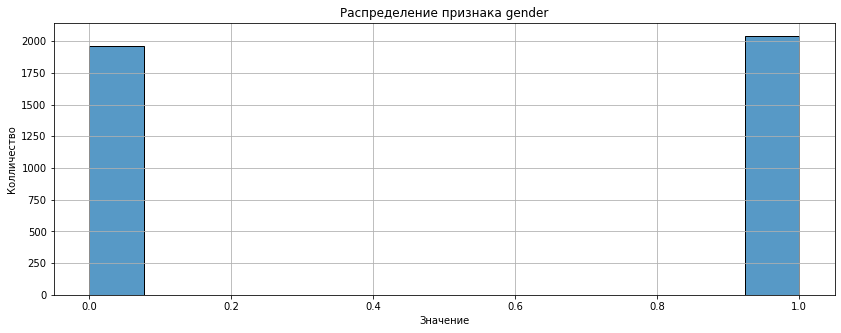

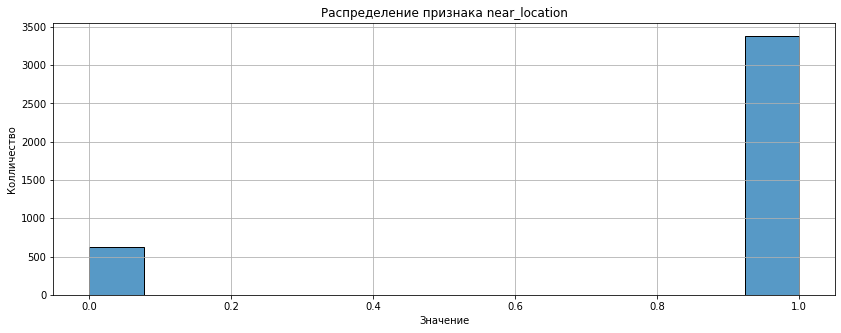

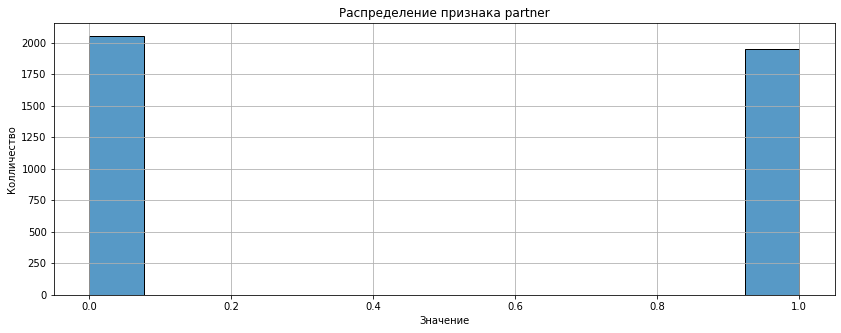

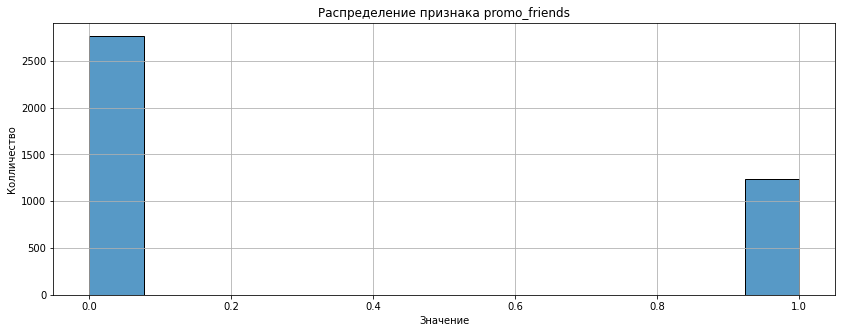

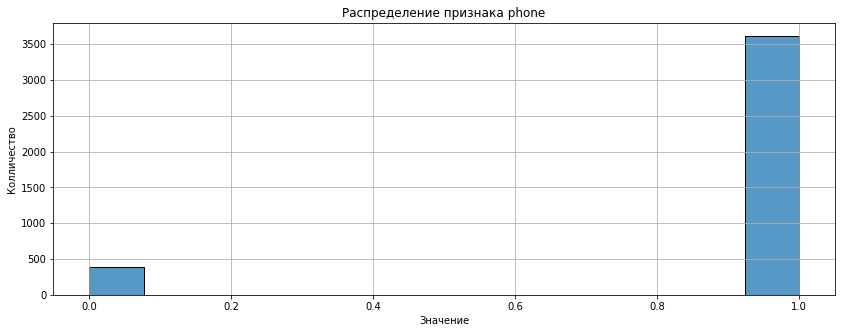

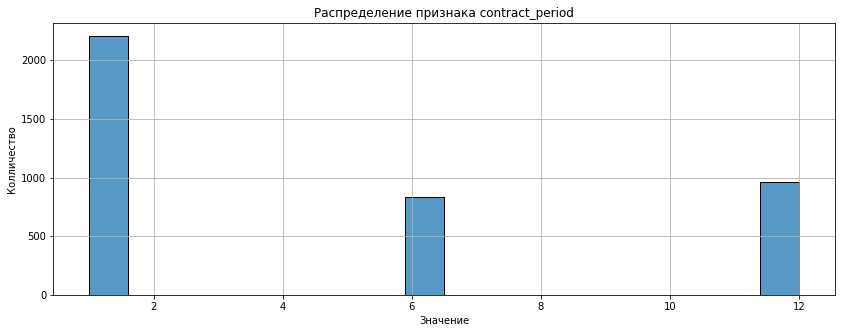

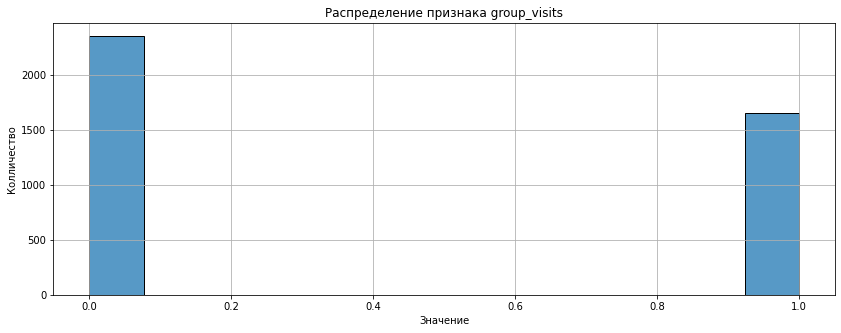

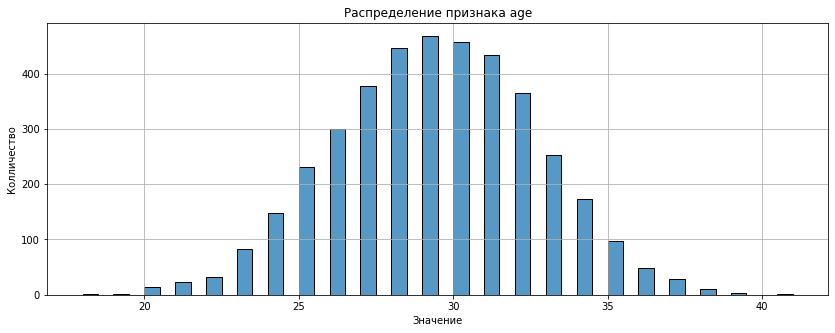

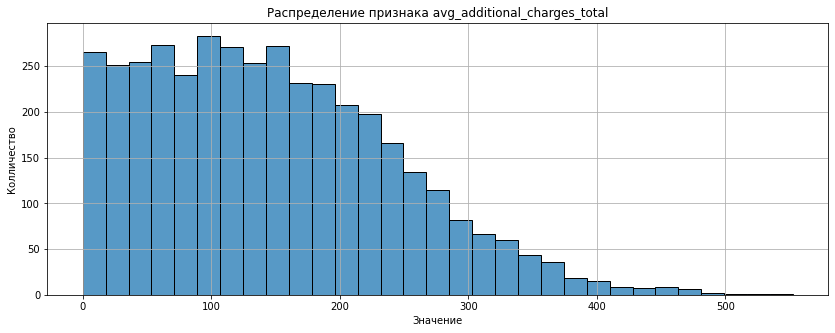

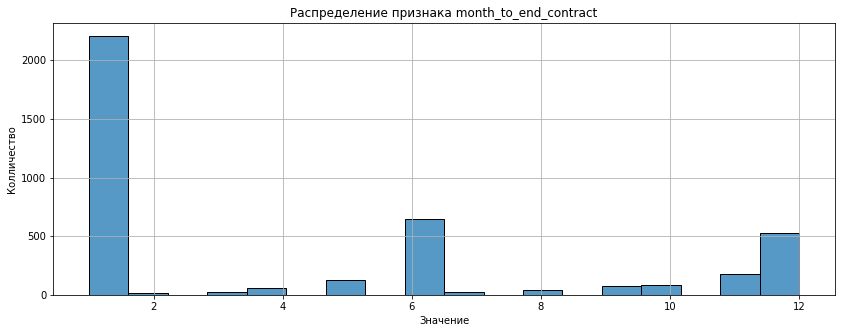

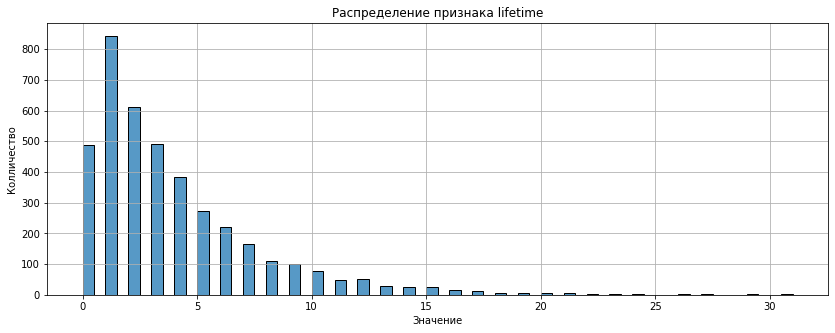

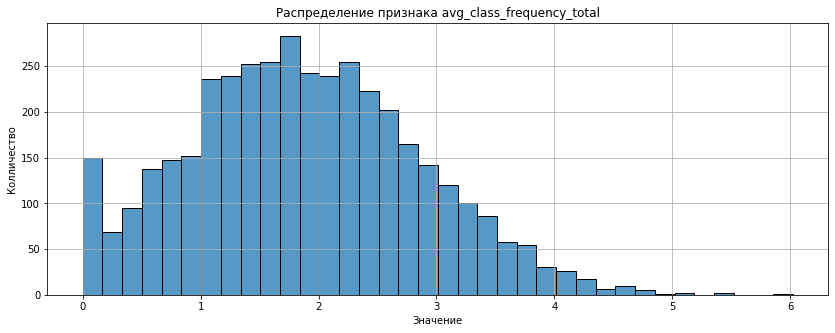

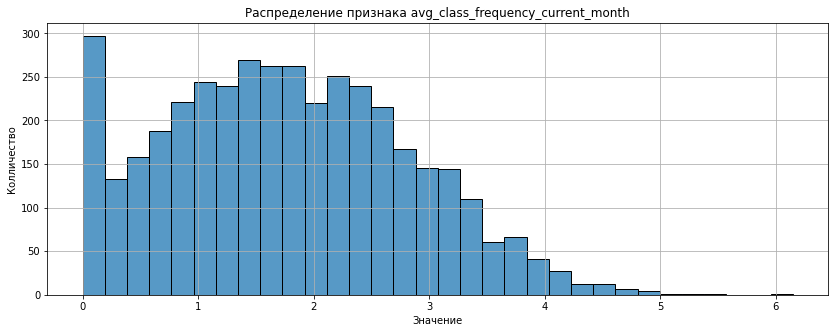

In [8]:
hist(gym_churn_1, columns)

In [9]:
columns = gym.drop(columns=['churn'])
def hist(df, columns):
    for i in columns:
        plt.figure(figsize =(14, 5))
        sns.histplot(data=gym, x=gym[i], binwidth=0.05, hue="churn")
        plt.title('Распределение признака {}'.format(i))
        plt.xlabel('Значение')
        plt.ylabel('Колличество')
        plt.grid() 
        plt.show() 

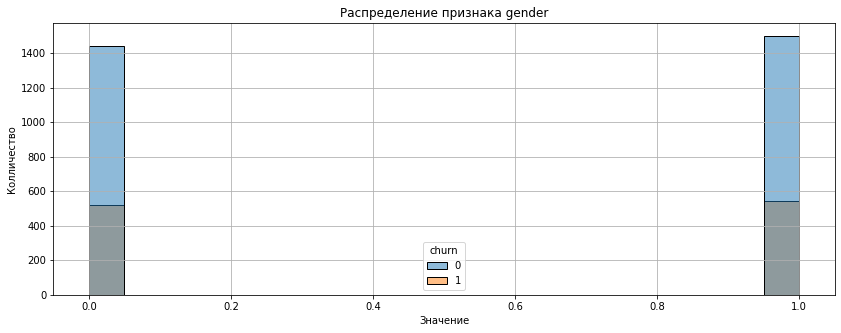

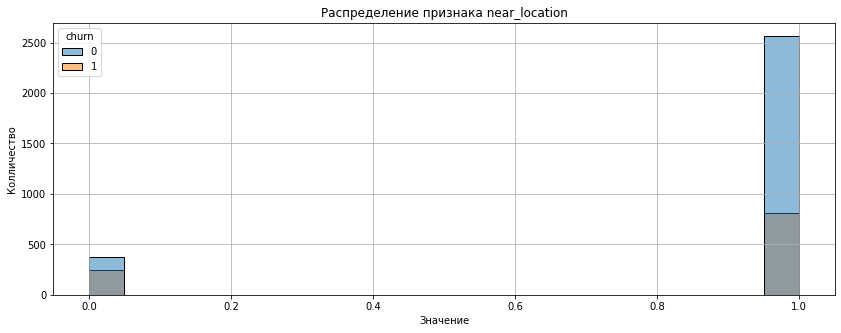

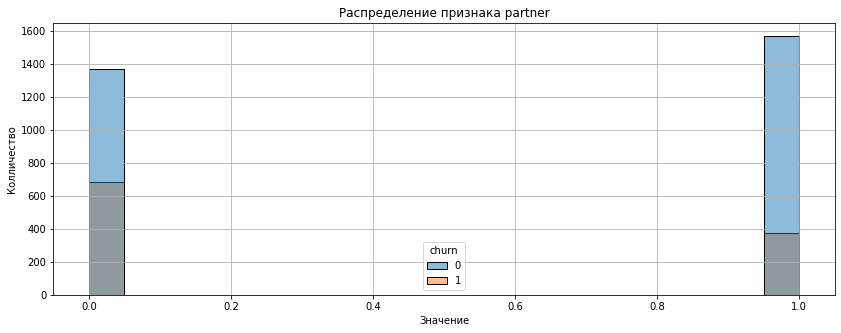

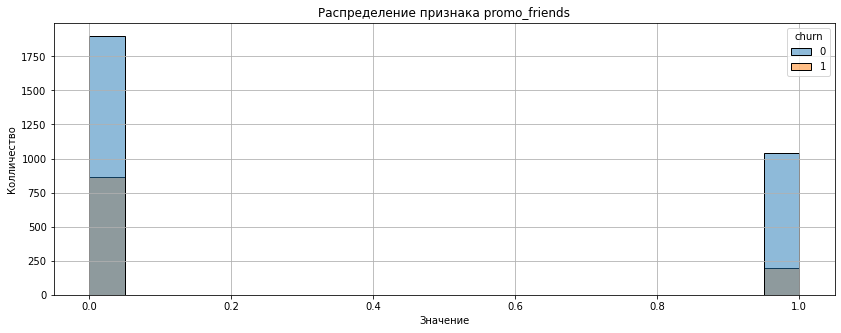

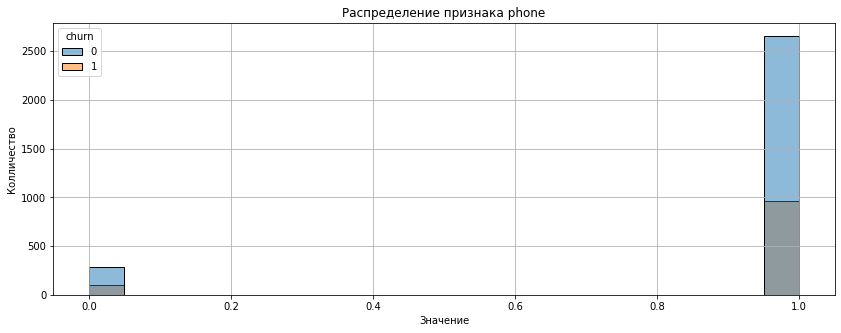

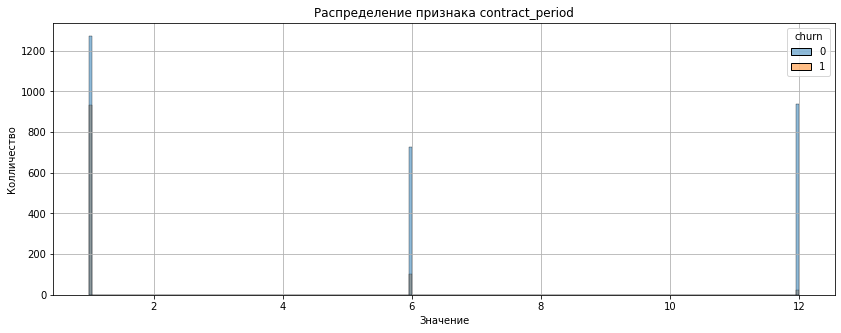

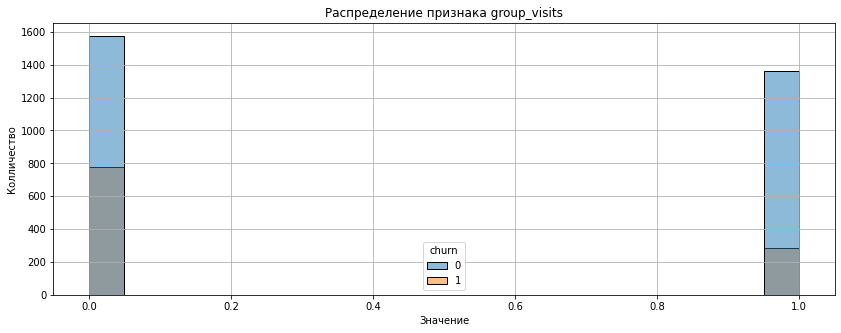

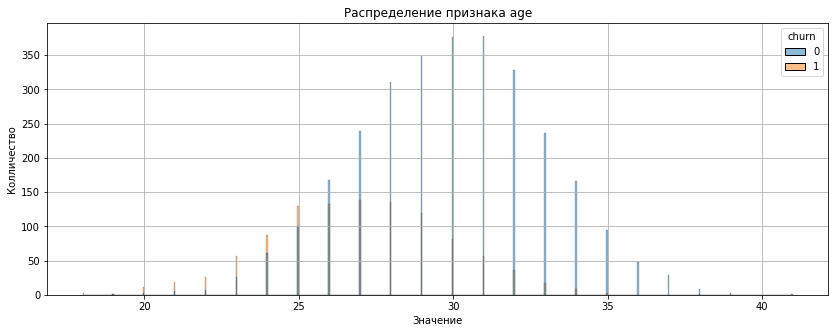

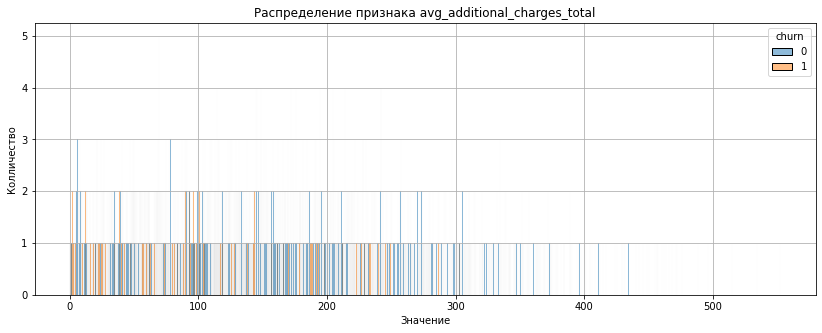

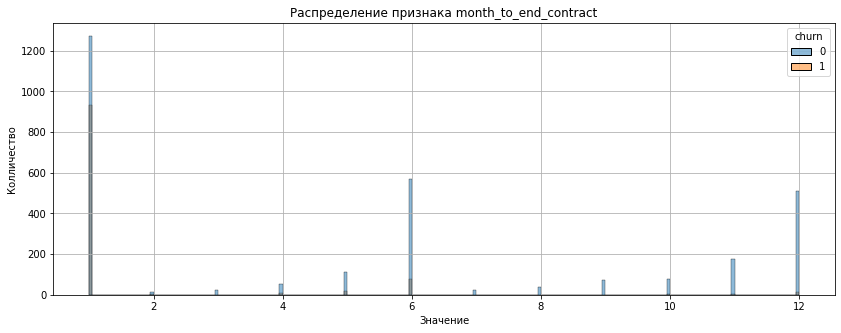

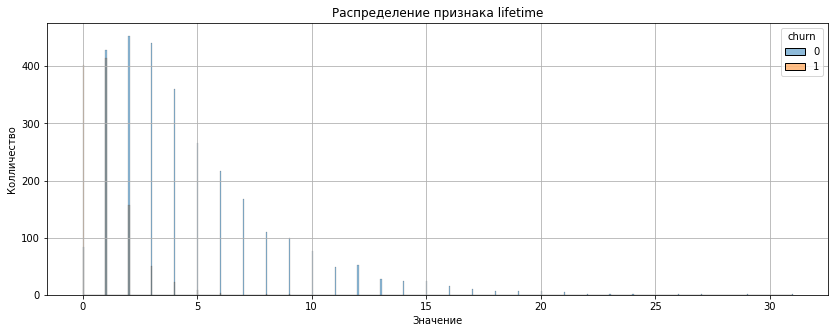

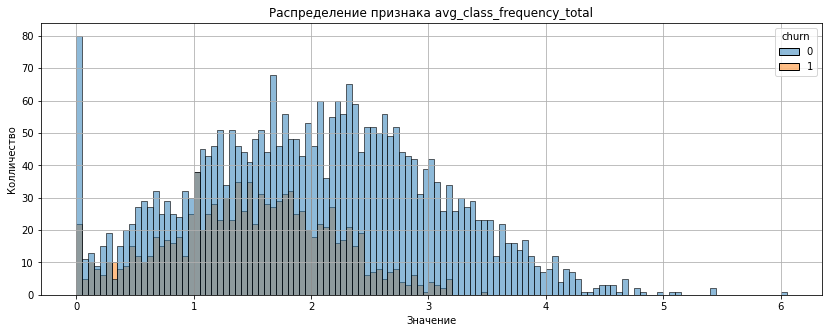

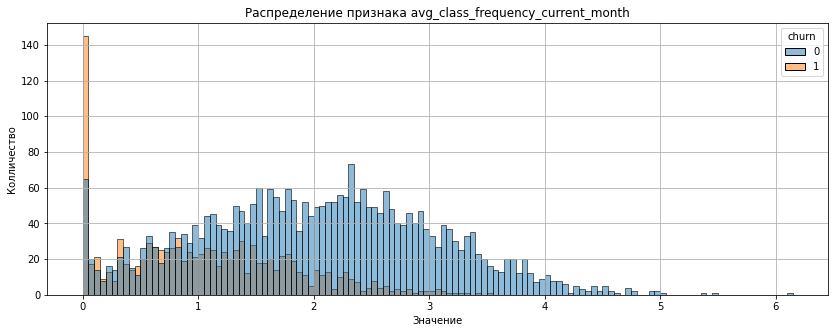

In [10]:
hist(gym, columns)

Вывод по клиентам, кто ушел:

1. Распределение мужчин и женщин примерно 50 на 50.
2. У большинства клиентов, кто ушел, клуб фитнес находился рядом с домом или работой.
3. Примерно половина ушедших клиентов - это сотрудники компаний-партнёров клуба, а вторая половина нет.
4. Большинство ушедших клиентов приходили не по акции "приведи друга".
5. Почти все клиенты оставили контанктный номер телефона.
6. Длительность текущего действующего абонемента для ушедших клиентов в большинстве своём составляет 1-2 месяц (более 2000 клиентов). У оставшихся 6 месяцев (примерно 800 клиентов), 12 месяцев (примерно 900 клиентов).
7. Почти 2400 из ушедших клиентов не ходили на групповые занятия, почти 1600 клиентов посещяли групповые занятия.
8. Распределение по возрасту нормальное. Средний возраст 29 лет.
9. Выручка от других услуг фитнес-центра, большая часть клиентов тратила до 300 у.е.
10. У большинства ушедших клиентов до окончания абонемента остался 1 месяц (2300 клиентов), у остальных 6 и 12 месяцев (по 500 там и там).
11. Большинство ушедших клиентов были новичками, они ходили в фитнес 1-2 месяца
12. Распределение по средней частоте посещений в неделю нормальное, в среднем 2 раза в неделю
13. Распределение по средней частоте посещений в неделю нормальное, в среднем 2 раза в неделю

In [11]:
gym.corr().style.background_gradient().set_precision(2)

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
gender,1.00,0.01,-0.01,-0.01,-0.01,0.00,0.02,0.01,-0.01,-0.00,0.01,0.01,0.01,0.00
near_location,0.01,1.00,-0.01,0.21,-0.02,0.15,0.15,0.06,0.04,0.14,0.07,0.04,0.06,-0.13
partner,-0.01,-0.01,1.00,0.45,0.01,0.31,0.02,0.05,0.02,0.29,0.06,0.02,0.05,-0.16
promo_friends,-0.01,0.21,0.45,1.00,0.00,0.24,0.12,0.05,0.04,0.24,0.07,0.03,0.05,-0.16
phone,-0.01,-0.02,0.01,0.00,1.00,-0.01,-0.01,-0.01,0.01,-0.01,-0.02,0.01,0.01,-0.00
contract_period,0.00,0.15,0.31,0.24,-0.01,1.00,0.17,0.14,0.11,0.97,0.17,0.10,0.16,-0.39
group_visits,0.02,0.15,0.02,0.12,-0.01,0.17,1.00,0.08,0.03,0.16,0.08,0.06,0.08,-0.18
age,0.01,0.06,0.05,0.05,-0.01,0.14,0.08,1.00,0.08,0.13,0.16,0.12,0.18,-0.40
avg_additional_charges_total,-0.01,0.04,0.02,0.04,0.01,0.11,0.03,0.08,1.00,0.11,0.08,0.04,0.08,-0.20
month_to_end_contract,-0.00,0.14,0.29,0.24,-0.01,0.97,0.16,0.13,0.11,1.00,0.16,0.09,0.15,-0.38


Из матрицы видно, что длительность текущего действующего абонемента хорошо коррелирует со сроком до окончания текущего действующего абонемента (0.97). Также хорошая корреляция заметна между средней частотой посещений в неделю за все время с начала действия абонемента и средней частотой посещений в неделю за предыдущий месяц (0.95).

Корелляция (0.45) наблюдается между призаком 'Partner' и признаком Promo_friends. Скорее всего, коллеги по работе рекомендовали фитнес другим своим коллегам.

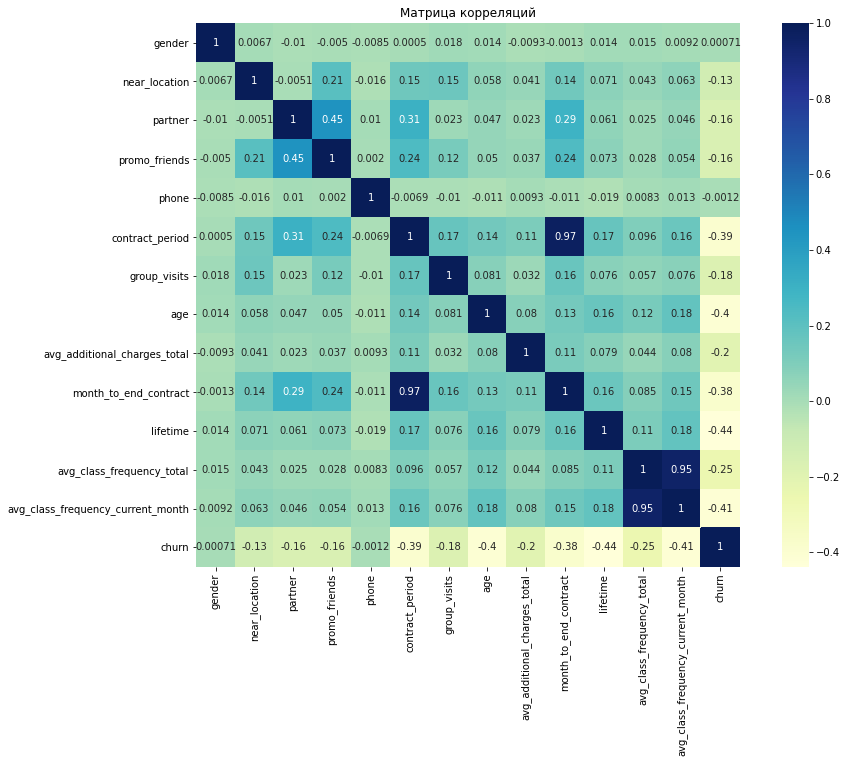

In [12]:
plt.figure(figsize=(15,10))
sns.heatmap(data = gym.corr(), annot=True, square=True, cmap='YlGnBu')
plt.title('Матрица корреляций')
plt.show()

# Шаг 3. Постройте модель прогнозирования оттока клиентов
Постройте модель бинарной классификации клиентов, где целевой признак — факт оттока клиента в следующем месяце:
* Разбейте данные на обучающую и валидационную выборку функцией train_test_split().
* Обучите модель на train-выборке двумя способами:
 * логистической регрессией,
 * случайным лесом.
* Оцените метрики accuracy, precision и recall для обеих моделей на валидационной выборке. Сравните по ним модели. Какая модель показала себя лучше на основании метрик?

In [13]:
X = gym.drop(columns=['churn'])
y = gym['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
scaler = StandardScaler()

models = [LogisticRegression(random_state=0), RandomForestClassifier(random_state=0)]

def make_prediction(m, X_train, y_train, X_test, y_test):
    model = m
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print('Accuracy_score:{:.2f} Precision_score:{:.2f} Recall_score:{:.2f}'.format(accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred),))

In [14]:
for i in models:
    print(i)
    make_prediction(
        m=i,
        X_train=X_train,
        y_train=y_train,
        X_test=X_test,
        y_test=y_test
    )

LogisticRegression(random_state=0)
Accuracy_score:0.91 Precision_score:0.82 Recall_score:0.80
RandomForestClassifier(random_state=0)
Accuracy_score:0.92 Precision_score:0.84 Recall_score:0.82


Доля правильных прогнозов и полнота чуть выше в модели случайного леса. Модель случайного леса показала себя лучше.

# Шаг 4. Сделайте кластеризацию клиентов
Отложите в сторону столбец с оттоком и проведите кластеризацию объектов (клиентов):
* Стандартизируйте данные.
* Постройте матрицу расстояний функцией linkage() на стандартизованной матрице признаков и нарисуйте дендрограмму. Внимание: отрисовка дендрограммы может занять время! На основании полученного графика предположите, какое количество кластеров можно выделить.
* Обучите модель кластеризации на основании алгоритма K-Means и спрогнозируйте кластеры клиентов. Договоримся за число кластеров принять n=5, чтобы ваши результаты можно было сравнивать с результатами остальных студентов. Однако, конечно, в жизни никто не скажет вам правильный ответ, и решение остаётся за вами (на основании изучения графика из предыдущего пункта).
* Посмотрите на средние значения признаков для кластеров. Можно ли сразу что-то заметить?
* Постройте распределения признаков для кластеров. Можно ли что-то заметить по ним?
* Для каждого полученного кластера посчитайте долю оттока (методом groupby()). Отличаются ли они по доле оттока? Какие кластеры склонны к оттоку, а какие — надёжны?

In [15]:
sc = StandardScaler()
X_sc = sc.fit_transform(X)

linked = linkage(X_sc, method = 'ward') 

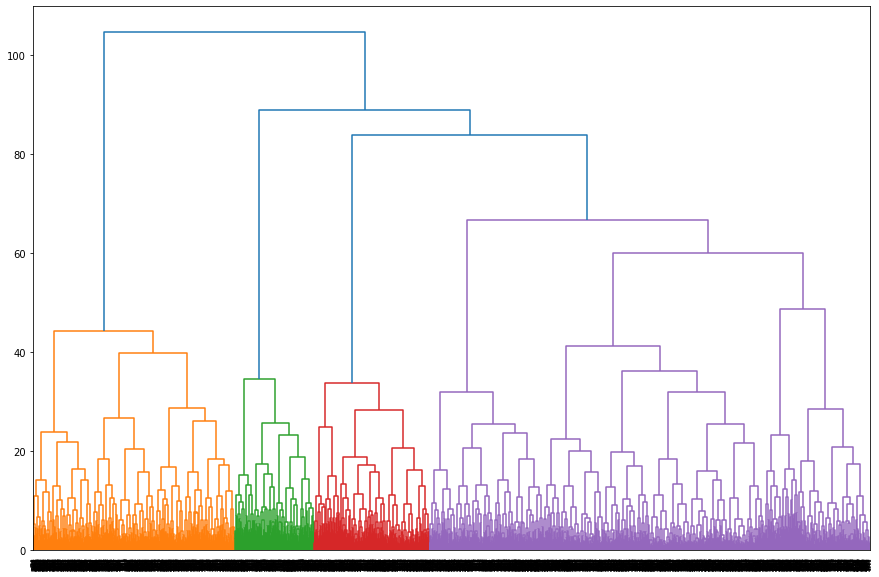

In [16]:
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.show() 

Явно выделены 4 кластера

In [17]:
km = KMeans(n_clusters = 5, random_state=0)
labels = km.fit_predict(X_sc)

In [18]:
gym['cluster_km'] = labels

gym.groupby('cluster_km').mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
cluster_km,,,,,,,,,,,,,,
0,0.502970,0.959406,0.783168,0.574257,1.000000,10.889109,0.542574,29.982178,160.761016,9.954455,4.736634,1.982055,1.974789,0.027723
1,0.522078,0.862338,0.470130,0.306494,0.000000,4.787013,0.425974,29.301299,143.957664,4.475325,3.924675,1.847220,1.716369,0.267532
2,0.495050,0.000000,0.463366,0.079208,1.000000,2.352475,0.215842,28.477228,135.457501,2.198020,2.809901,1.660461,1.477324,0.443564
3,0.485737,1.000000,0.350238,0.240095,1.000000,1.948494,0.341521,28.167987,131.622204,1.856577,2.440571,1.247634,1.012983,0.514263
4,0.559666,0.976134,0.356802,0.230310,0.998807,2.669451,0.473747,30.125298,161.657905,2.459427,4.898568,2.852002,2.850161,0.068019


Кластер 0:
* отток 2% 
* живут рядом с фитнесом
* сотрудники компании партнера
* текущий абонемент на 10 месяцев
* ходят на групповые занятия

Кластер 1:
* отток 27%
* живут рядом
* не указали контактный номер

Кластер 2:
* отток 44%
* живут далеко от фитнеса
* пришли не по акции "Приведи друга"
* текущий абонимент на 2 месяца
* почти не ходят на групповые
* посещяют фитнес всего 6 раз в месяц

Кластер 3:
* 51%
* живут рядом с фитнесом
* до конца абонимента меньбше 2 месяцев
* посещяют фитнес всего 4 раз в месяц

Кластер 4:
* отток 7%
* живут рядом с фитнесом
* посещяют фитнес 11 раз в месяц

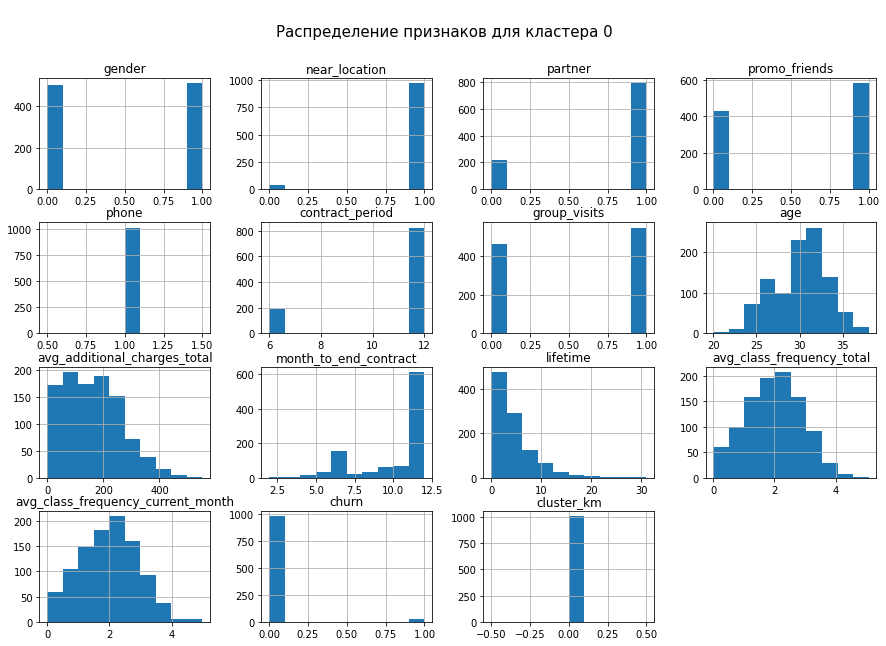

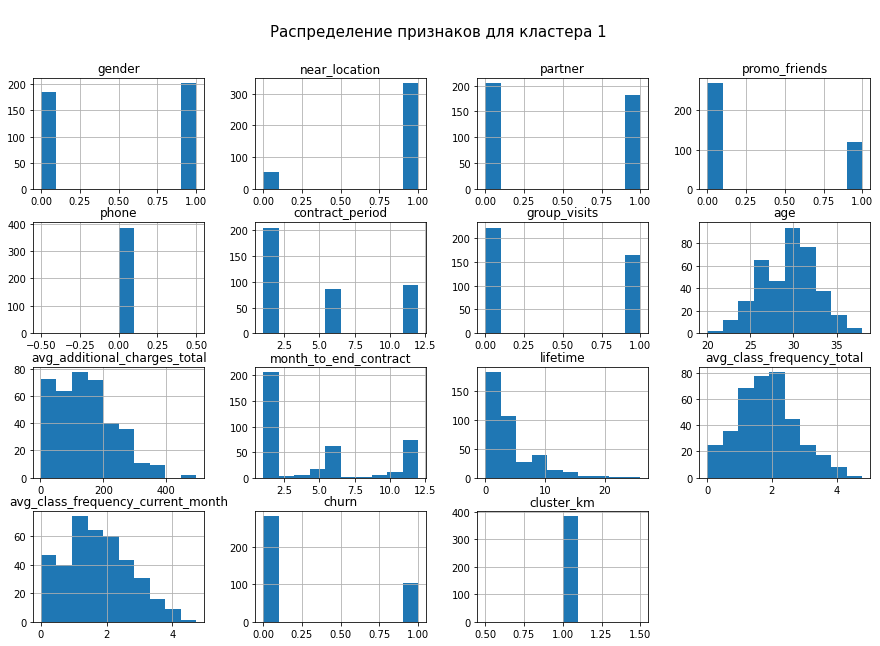

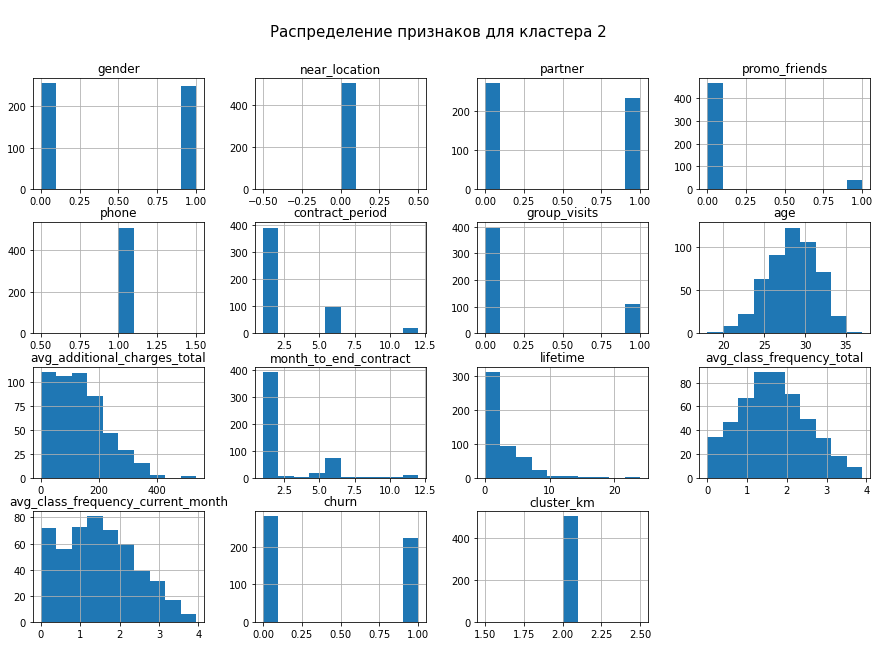

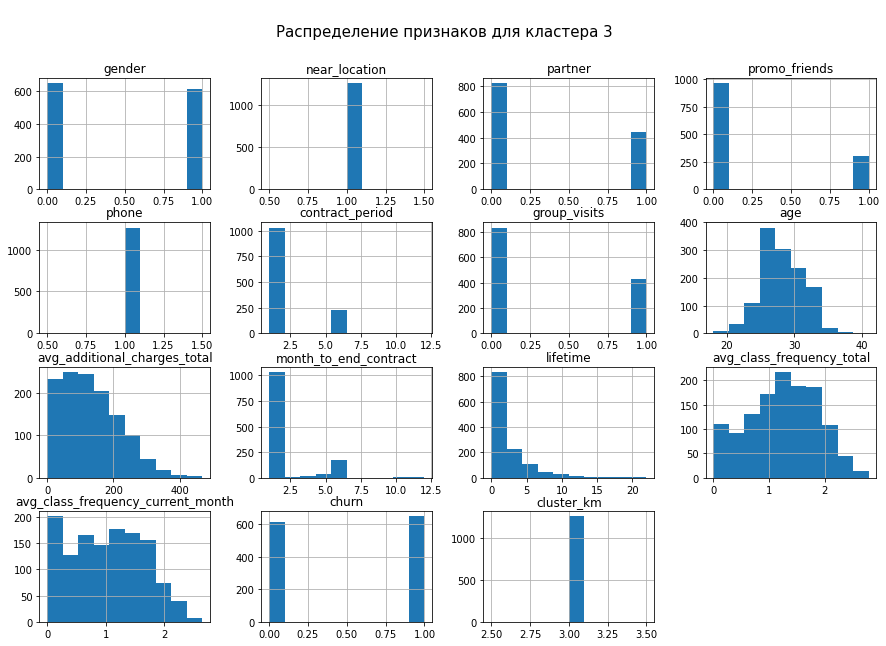

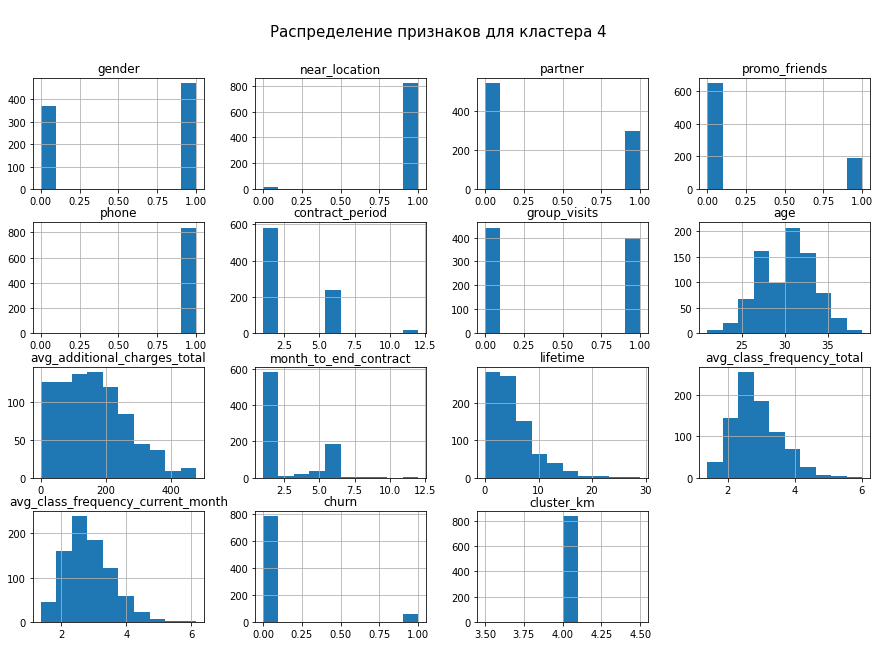

In [19]:
for value in [0, 1, 2, 3, 4]:
  gym[gym['cluster_km']==value].hist(figsize=(15,10))
  plt.suptitle('\nРаспределение признаков для кластера {}'.format(value), fontsize = 15)
  plt.show()

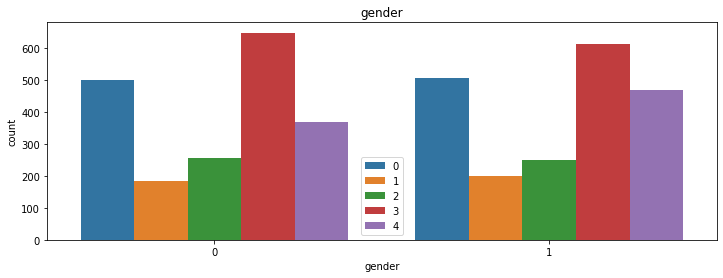

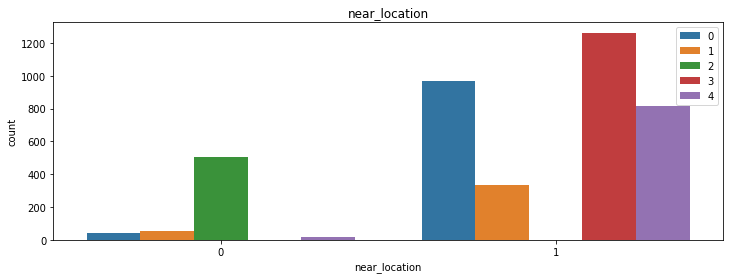

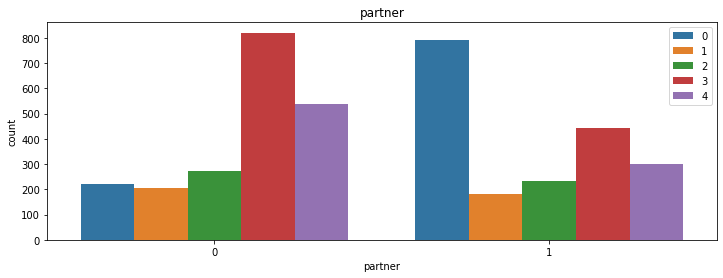

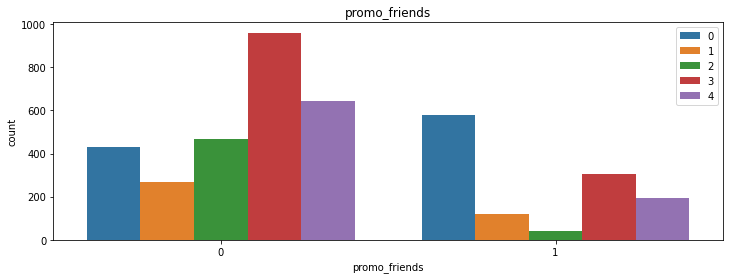

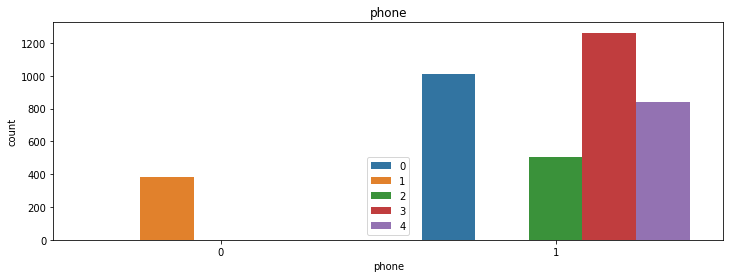

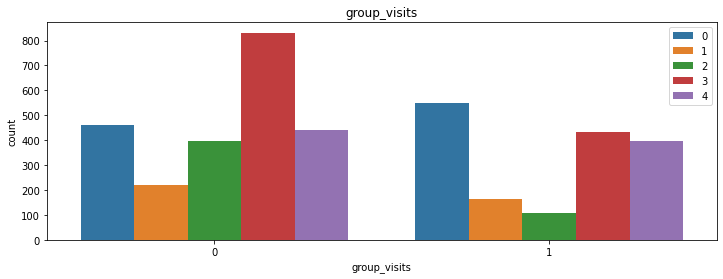

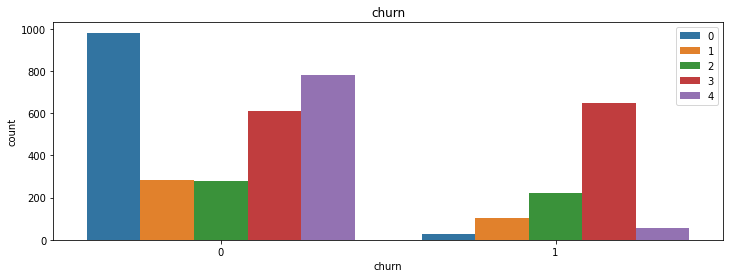

In [20]:
categorical_columns = ['gender', 'near_location', 'partner', 'promo_friends', 'phone', 'group_visits','churn']

for column in categorical_columns:
    plt.figure(figsize=(12, 4))
    sns.countplot(x=gym[column], hue="cluster_km", data=gym)
    plt.title(column)
    plt.legend()
    plt.show()

No handles with labels found to put in legend.


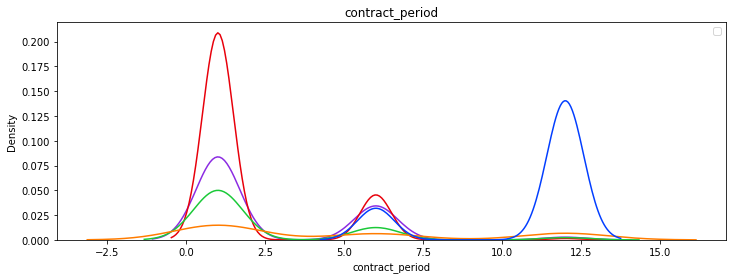

No handles with labels found to put in legend.


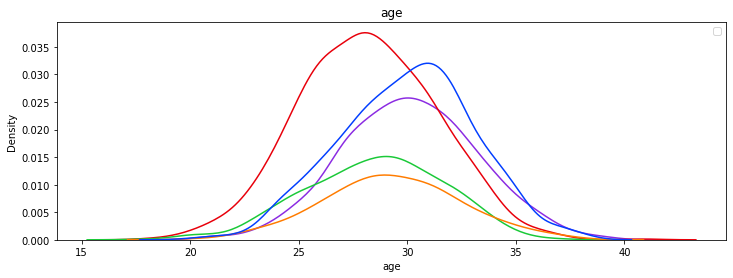

No handles with labels found to put in legend.


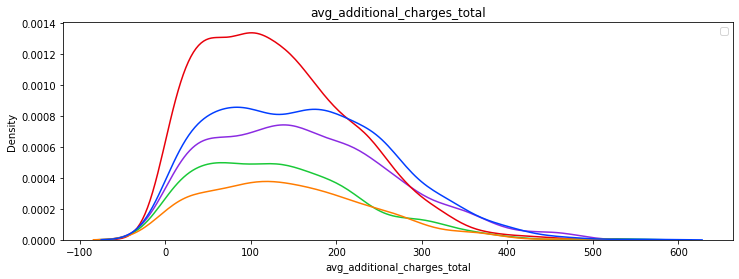

No handles with labels found to put in legend.


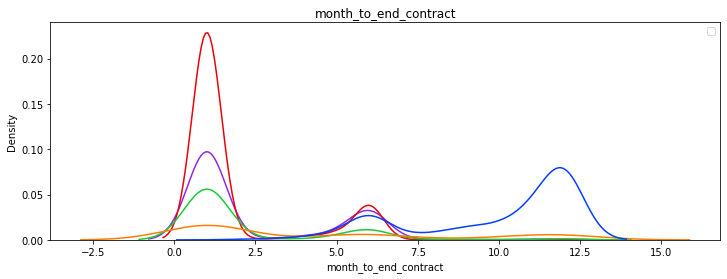

No handles with labels found to put in legend.


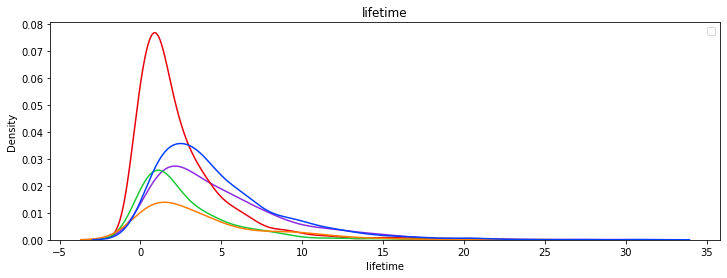

No handles with labels found to put in legend.


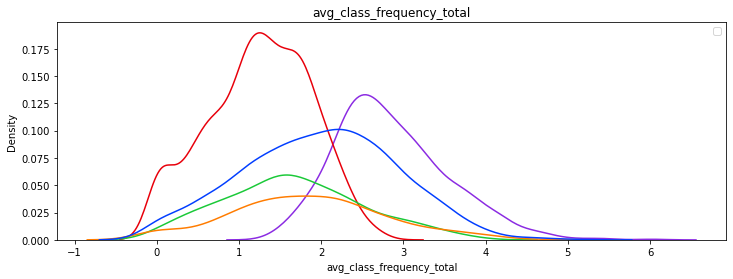

No handles with labels found to put in legend.


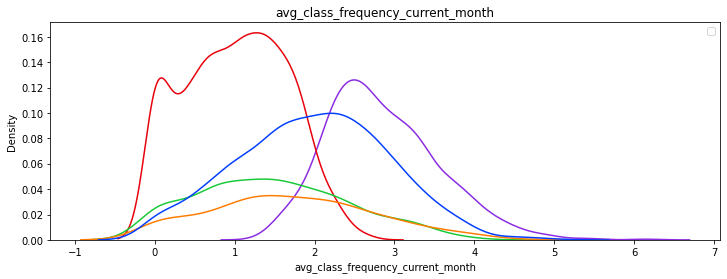

In [21]:
numeric_columns = ['contract_period', 'age', 'avg_additional_charges_total', 'month_to_end_contract', 'lifetime', 'avg_class_frequency_total','avg_class_frequency_current_month']

for column in numeric_columns:
    plt.figure(figsize=(12, 4))
    sns.kdeplot(x=gym[column], hue="cluster_km", data=gym, palette='bright')
    plt.title(column)
    plt.legend()
    plt.show()

Выводы:

**Признак пол**  
Распределение по полу во всех кластерах почти одинаковое

**Проживание или работа в районе, где находится фитнес-центр**  
Во всех кластерах клиенты жиут рядом с фитнесом, кроме кластера 2

**Сотрудник компании-партнёра клуба**  
Кластер 0 - сотрудники партнеров   
Кластер 1,2 - 50 на 50  
Кластер 3,4 - не сотрудники партнеров

**Использовал промо-код от знакомого при оплате первого абонемента**  
Кластер 0 - пришли по акции  
Клстер 1,2,3,4 - пришли сами

**Наличие контактного телефона**  
Во всех кластерах указали номер, кроме кластера 1

**Длительность текущего действующего абонемента**  
Во всех клстерах абонимент на 1 месяц, кроме кластера 0, там 12 месяцев

**Факт посещения групповых занятий**  
В кластерах 0,1,4 половира клиенто хоядт на групповые
в кластерах 2,3 почти не посещяют групповые

**Возраст**  
Во всех кластерах возраст распределен нормально, среднем 28-30 лет

**Суммарная выручка от других услуг**  
Во всех кластерах выручка распределена нормально, кластер 0 и 4 в топе

**Срок до окончания текущего действующего абонемента**  
Кластер 0 - 12 месяцев  
Кластер 1,2,3,4 - 1 месяц

**Время с момента первого обращения в фитнес-центр**  
Кластер 0,4 - уже 4-6 месяцев посещяют фитнес  
Кластер 1,2,3 - всего 1-2 месяца

**Средняя частота посещений в неделю за все время с начала действия абонемента**  
Кластер 0 и 4 - самая высокая посещяемость  неделю 2-3
Остальные кластеры - 1-2

**Факт оттока в текущем месяце**  
Кластер 0,1,4 - малый отток
Кластер 2 и 3 - отток почти 50%



In [22]:
churn = gym.groupby('cluster_km')['churn'].agg('sum') / gym.groupby('cluster_km')['churn'].size()
display(churn)

cluster_km
0    0.027723
1    0.267532
2    0.443564
3    0.514263
4    0.068019
Name: churn, dtype: float64

Кластер 2 и 3 склонны к оттоку  
Кластер 0 и 4 надежны

# Шаг 5. Сформулируйте выводы и сделайте базовые рекомендации по работе с клиентами
* Сформулируйте основные выводы и предложите рекомендации для стратегии взаимодействия с клиентами и их удержания.

* Не описывайте стратегию детально: достаточно 3-4 важных принципов и примеров их реализации в виде определённых маркетинговых действий.

В данном проекте анализ данных по анкетам клиентов сети фитнес-центров «Культурист-датасаентист»

В ходе анализа мы выделили несколько групп клиентов:
* Клиенты, котрые живут или работают рядом с фитнесом, отток по ним минимальный
* Клиенты, которые пришли по акции "Приведи друга", отток по ним минимальный, чтобы его снизить, можно увеличить бонус
* Клиенты, сотрудники компаний-партнеров, отток незначительный. Следовательно можно уеличить число партнеров компаний, которые находтся рядом и предложить компаниям корпоративные абонименты, и устривать соревнования и турниры на базе фитнес- центра
* Клиенты, которые не указали контактный номер, чаще попадают в отток, чтобы этого избежать, необходимо обязать клиентов указывать свой номер и периодически их актуализировать
* Клиенты, у которых абонимент заканчивается через 1-2 месяца, чаще всего попадают в отток, их необходимо добавить в зону риска, и предлагать спецальные условия продления абонимента
* Клиенты, которые не посещяют групповые занятия, попадают в отток, таких клиентов, больше мотивировать на посещение групповых занятий. Предлагать дополнительные бонусы или скидки на доп услуги, для тех, кто посещяет групповые занятия. Так же можно привлечь популярных людей (знаменитости, проф. спортсмены, лидеры мнений) - это повысит престиж и статусность фитнес центра, сответственно люди будут хотеть заниматься в одном месте со знаменитостями
* Клиенты, котрые ходят первые 1-2 месяца, на особый контроль, за ними можно закрепить наставника, который поможет освоиться в центре
* Клиенты, которые редко посещяют фитнес (1 раз в неделю), в зоне риска на отток. С ними можно связать лично и узнать по какой причине они не ходят, и предложить выходы из сложившейся ситуации